# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [87]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [88]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [89]:
#Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, time e net_bill.

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)

In [90]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [91]:
# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.64e-20
Time:                        23:58:09   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [92]:
#Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, time e net_bill.

y, X = patsy.dmatrices('tip ~ smoker + time + net_bill + 1', tips)

In [93]:
# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.35
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.79e-21
Time:                        23:58:09   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             758.3
Df Residuals:                     240   BIC:                             772.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1978      0.221      5.

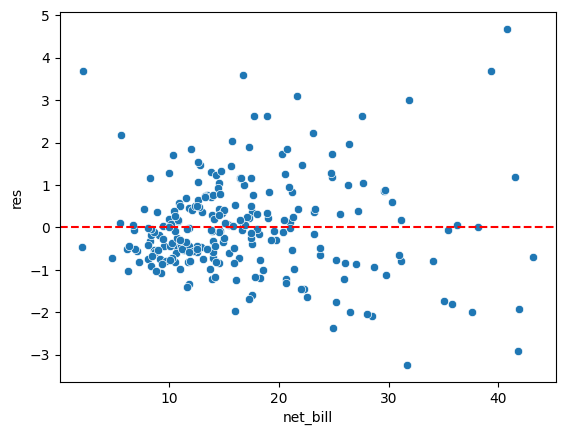

In [94]:
tips['res'] = model.resid

# Gráfico de resíduos em função de net_bill

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [95]:
# teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

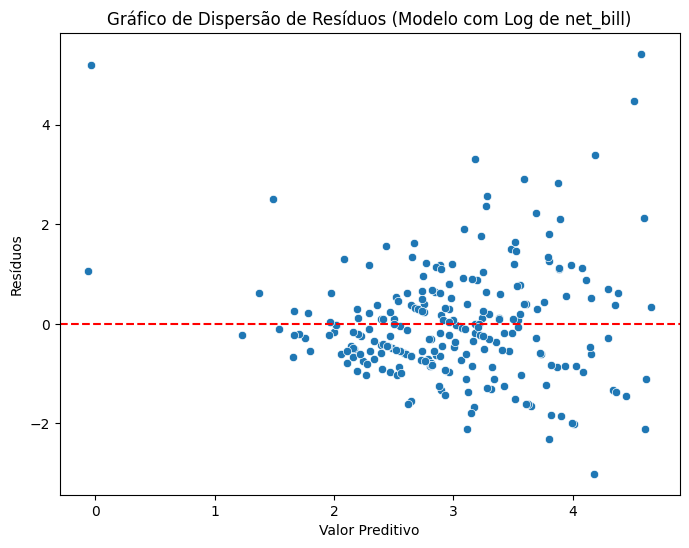

In [114]:
# Ajustando o modelo com log de net_bill
y_log, X_log = patsy.dmatrices('tip ~ np.log(net_bill) + time + 1', tips)
model_log = sm.OLS(y_log, X_log).fit()

# Adicionando a coluna de resíduos ao DataFrame
tips['residuos'] = model_log.resid

# Gráfico de dispersão de resíduos em função do valor predito
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model_log.fittedvalues, y=tips['residuos'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão de Resíduos (Modelo com Log de net_bill)')
plt.xlabel('Valor Preditivo')
plt.ylabel('Resíduos')
plt.show()

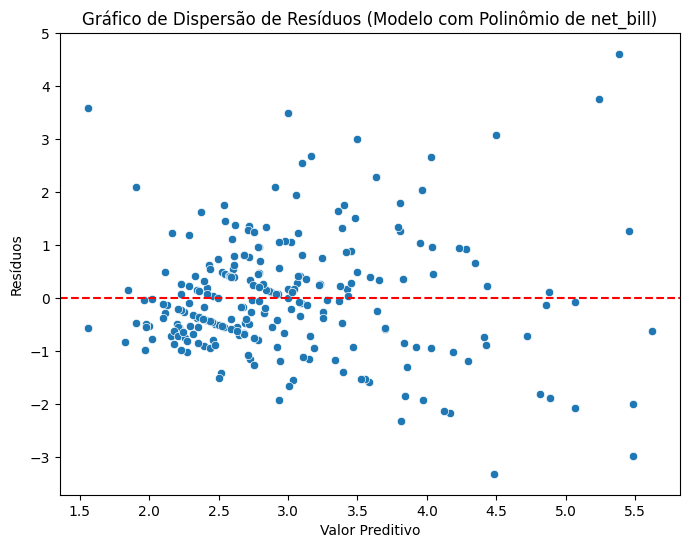

In [115]:
# Ajustando o modelo com o polinômio de net_bill
y_2, X_2 = patsy.dmatrices('tip ~ net_bill**2 + time + 1', tips)
model_quad = sm.OLS(y_2, X_2).fit()

# Adicionando a coluna de resíduos ao DataFrame
tips['residuos_quad'] = model_quad.resid

# Gráfico de dispersão de resíduos em função do valor predito
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model_quad.fittedvalues, y=tips['residuos_quad'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão de Resíduos (Modelo com Polinômio de net_bill)')
plt.xlabel('Valor Preditivo')
plt.ylabel('Resíduos')
plt.show()

Analisando exclusivamente os gráficos gerados, o modelo com polinômio me parece ter os residuos mais uniformes.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [98]:
# Criando a matriz de design e a matriz y usando Patsy
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

# Ajustando o modelo
model = sm.OLS(y_log, X_log).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.21e-18
Time:                        23:58:11   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

In [99]:
# Criando a matriz de design e a matriz y usando Patsy
y_log, X_log = patsy.dmatrices('np.log(tip) ~ smoker + net_bill', tips)

# Ajustando o modelo
model = sm.OLS(y_log, X_log).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.31e-20
Time:                        23:58:11   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254   

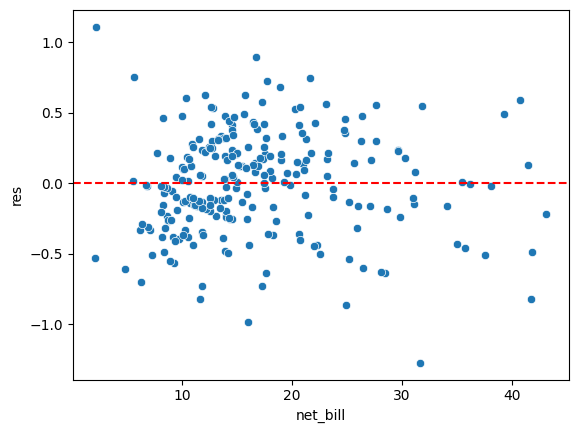

In [100]:
tips['res'] = model.resid

# Gráfico de resíduos em função de net_bill

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [101]:
# Criando a matriz de design e a matriz y usando Patsy
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + np.log(net_bill)', tips)

# Ajustando o modelo
model = sm.OLS(y_log, X_log).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     28.12
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.79e-19
Time:                        23:58:12   Log-Likelihood:                -96.213
No. Observations:                 244   AIC:                             202.4
Df Residuals:                     239   BIC:                             219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4185      0.145  

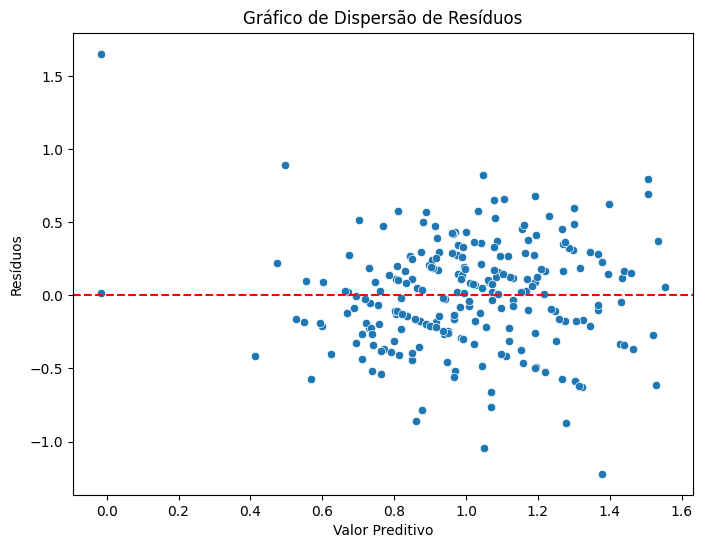

In [102]:
# Adicionando a coluna de resíduos ao DataFrame
tips['res'] = model.resid

# Gráfico de dispersão de resíduos em função do valor predito
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=tips['res'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão de Resíduos')
plt.xlabel('Valor Preditivo')
plt.ylabel('Resíduos')
plt.show()

In [103]:
# Criando a matriz de design e a matriz y usando Patsy
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill**2', tips)

# Ajustando o modelo
model = sm.OLS(y_log, X_log).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.21e-18
Time:                        23:58:12   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

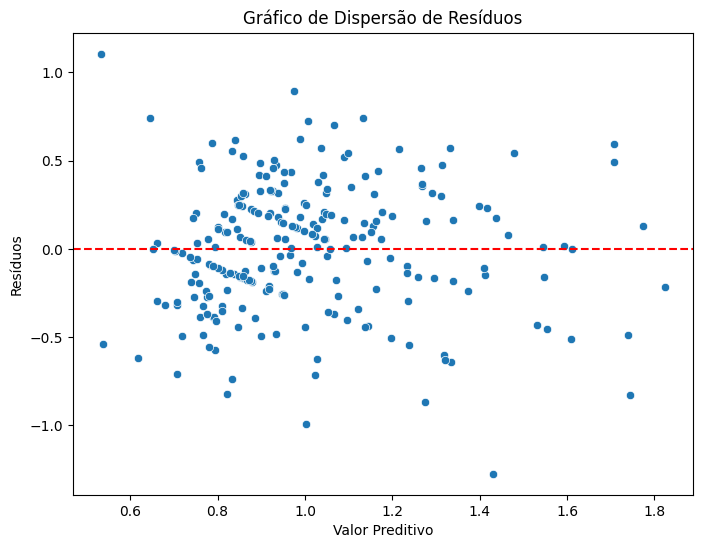

In [104]:
# Adicionando a coluna de resíduos ao DataFrame
tips['res'] = model.resid

# Gráfico de dispersão de resíduos em função do valor predito
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=tips['res'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão de Resíduos')
plt.xlabel('Valor Preditivo')
plt.ylabel('Resíduos')
plt.show()

In [105]:
# Obtendo os valores preditos na escala original
predicted_values = np.exp(model.fittedvalues)

# Calculando o R^2 na escala original
r_squared_original = np.corrcoef(tips['tip'], predicted_values)[0, 1]**2

print(f"O coeficiente de determinação R^2 na escala original é: {r_squared_original}")

O coeficiente de determinação R^2 na escala original é: 0.3244510107999182


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [106]:
# Carregando dados
df = pd.read_csv('previsao_de_renda.csv')

# Retirando valores nulos
df = df.dropna()

df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [107]:
#Criando modelo

y, X = patsy.dmatrices('renda ~ tempo_emprego + 1', df)

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:58:13   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

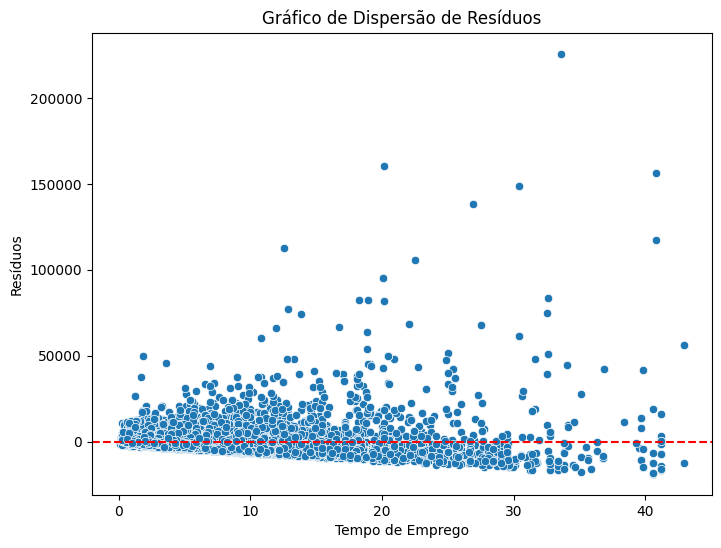

In [108]:
# Adicionando a coluna de resíduos ao DataFrame
df['residuos'] = model.resid

# Gráfico de dispersão de resíduos em função da variável explicativa (tempo_emprego)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tempo_emprego', y='residuos', data=df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão de Resíduos')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.show()

In [109]:
#Criando modelo

y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + 1', df)

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:58:14   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

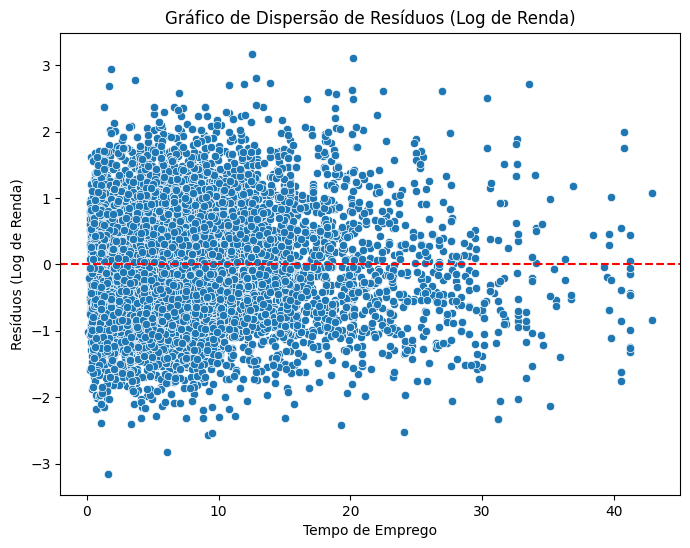

In [110]:
# Adicionando a coluna de resíduos ao DataFrame
df['residuos_log'] = model.resid

# Gráfico de dispersão de resíduos em função da variável explicativa (tempo_emprego)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tempo_emprego', y='residuos_log', data=df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão de Resíduos (Log de Renda)')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos (Log de Renda)')
plt.show()

In [111]:
# Criando modelo
y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + tempo_emprego + 1', df)

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     310.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:58:14   Log-Likelihood:                -13593.
No. Observations:               12427   AIC:                         2.723e+04
Df Residuals:                   12404   BIC:                         2.740e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [112]:
# Criando modelo
y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + estado_civil + tempo_emprego + 1', df)

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     517.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:58:15   Log-Likelihood:                -13625.
No. Observations:               12427   AIC:                         2.728e+04
Df Residuals:                   12413   BIC:                         2.738e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

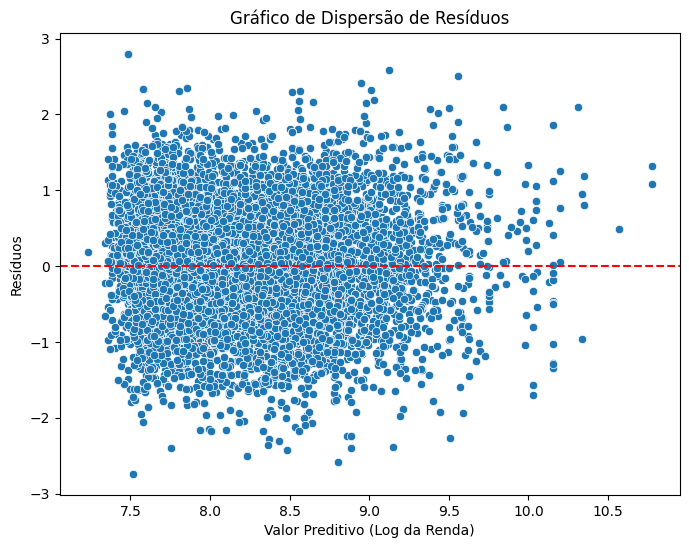

In [113]:
# Adicionando a coluna de resíduos ao DataFrame
df['residuos'] = model.resid

# Gráfico de dispersão de resíduos em função do valor predito
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=df['residuos'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão de Resíduos')
plt.xlabel('Valor Preditivo (Log da Renda)')
plt.ylabel('Resíduos')
plt.show()

O R² ao adicionar mais variáveis ficou com um valor adequado de 0.352. Além disso, o gráfico de dispersão dos erros continua uniforme. Acredito que os ajustes tenham gerado um efeito positivo.